In [1]:
import qiskit.circuit as circuit
import qiskit.pulse as pulse
import qiskit.compiler as compiler
import retworkx.visualization as rxv
import numpy as np
from qiskit.providers.tergite import Tergite
from qiskit.visualization.pulse_v2.stylesheet import IQXDebugging, IQXSimple

In [2]:
chalmers = Tergite.get_provider()
backend = chalmers.get_backend(input("Backend name? "))
backend.set_options(shots=1500)
print(f"Loaded Tergite backend {backend.name}")

Backend name? Nov7
Loaded Tergite backend Nov7


In [3]:
# this chip has 5 qubits, but we will only use 4, meaning the last one will be used as ancilla
qc = circuit.QuantumCircuit(4, 4)
qc.barrier([0, 1, 2, 3])

qc.reset(1)
qc.reset(2)
qc.reset(3)

qc.h(2)
qc.h(2)  # note that this is optimized away, since HH = I
qc.h(3)  # this will transpile to ZXZ
qc.rx(np.pi, 1)  # we can also do arbitrary rotations around x-axis
qc.measure([1, 2, 3], [1, 2, 3])
qc.draw()

░                          
q_0: ─░──────────────────────────
      ░      ┌───────┐     ┌─┐   
q_1: ─░──|0>─┤ Rx(π) ├─────┤M├───
      ░      └─┬───┬─┘┌───┐└╥┘┌─┐
q_2: ─░──|0>───┤ H ├──┤ H ├─╫─┤M├
      ░        ├───┤  └┬─┬┘ ║ └╥┘
q_3: ─░──|0>───┤ H ├───┤M├──╫──╫─
      ░        └───┘   └╥┘  ║  ║ 
c: 4/═══════════════════╩═══╩══╩═
                        3   1  2

In [4]:
tc = compiler.transpile(qc, backend=backend)
tc.draw()

This Target object contains multiqubit gates that operate on > 2 qubits. This will not be reflected in the output coupling map.
This Target object contains multiqubit gates that operate on > 2 qubits. This will not be reflected in the output coupling map.
This Target object contains multiqubit gates that operate on > 2 qubits. This will not be reflected in the output coupling map.
This Target object contains multiqubit gates that operate on > 2 qubits. This will not be reflected in the output coupling map.


global phase: π/2
                ░                                                
      q_0 -> 0 ─░────────────────────────────────────────────────
                ░       ┌───────┐               ┌─┐              
      q_1 -> 1 ─░──|0>──┤ Rx(π) ├───────────────┤M├──────────────
                ░       └───────┘ ┌─┐           └╥┘              
      q_2 -> 2 ─░──|0>────────────┤M├────────────╫───────────────
                ░      ┌─────────┐└╥┘┌─────────┐ ║ ┌─────────┐┌─┐
      q_3 -> 3 ─░──|0>─┤ Rz(π/2) ├─╫─┤ Rx(π/2) ├─╫─┤ Rz(π/2) ├┤M├
                ░      └─────────┘ ║ └─────────┘ ║ └─────────┘└╥┘
ancilla_0 -> 4 ────────────────────╫─────────────╫─────────────╫─
                                   ║             ║             ║ 
          c: 4/════════════════════╩═════════════╩═════════════╩═
                                   2             1             3

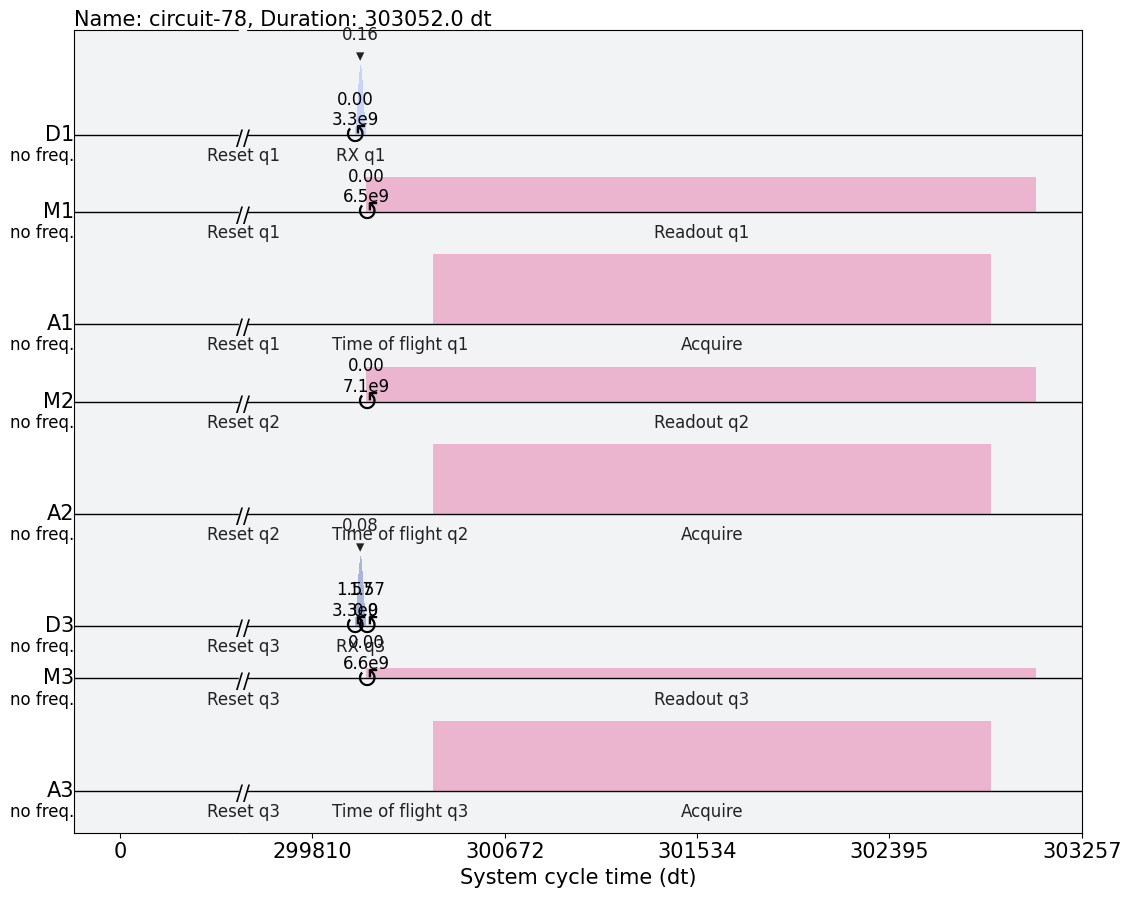

In [5]:
sched = compiler.schedule(tc, backend=backend)
sched.draw(style=IQXDebugging())

In [20]:
print(backend.make_qobj(sched, meas_level=1))

Pulse Qobj: 2b48e297-5397-48b9-8754-d779abe0c720:
Config: {'init_qubits': True,
 'meas_level': 1,
 'meas_lo_freq': [0.0, 0.0, 0.0, 0.0, 0.0],
 'meas_return': 'avg',
 'memory': False,
 'memory_slot_size': 100,
 'memory_slots': 4,
 'n_qubits': 5,
 'parametric_pulses': ['constant',
                       'zero',
                       'square',
                       'sawtooth',
                       'triangle',
                       'cos',
                       'sin',
                       'gaussian',
                       'gaussian_deriv',
                       'sech',
                       'sech_deriv',
                       'gaussian_square',
                       'drag'],
 'pulse_library': [],
 'qubit_lo_freq': [0.0, 0.0, 0.0, 0.0, 0.0],
 'shots': 1024}
Header: {'backend_name': 'Nov7', 'backend_version': '2022.10.21'}
Experiments:

Pulse Experiment:
Header:
{'memory_slots': 4, 'metadata': {}, 'name': 'circuit-118'}
Config:
{}

	Instruction: delay
		t0: 0
		ch: d1
		duration: